Vamos a realizar el ETL de nuestro dataset "walmart_stock_prices". En ella vamos a ver los datos faltantes y las descripciones de cada columna para que nosotros podamos trabajar tranquilamente en este proyecto

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

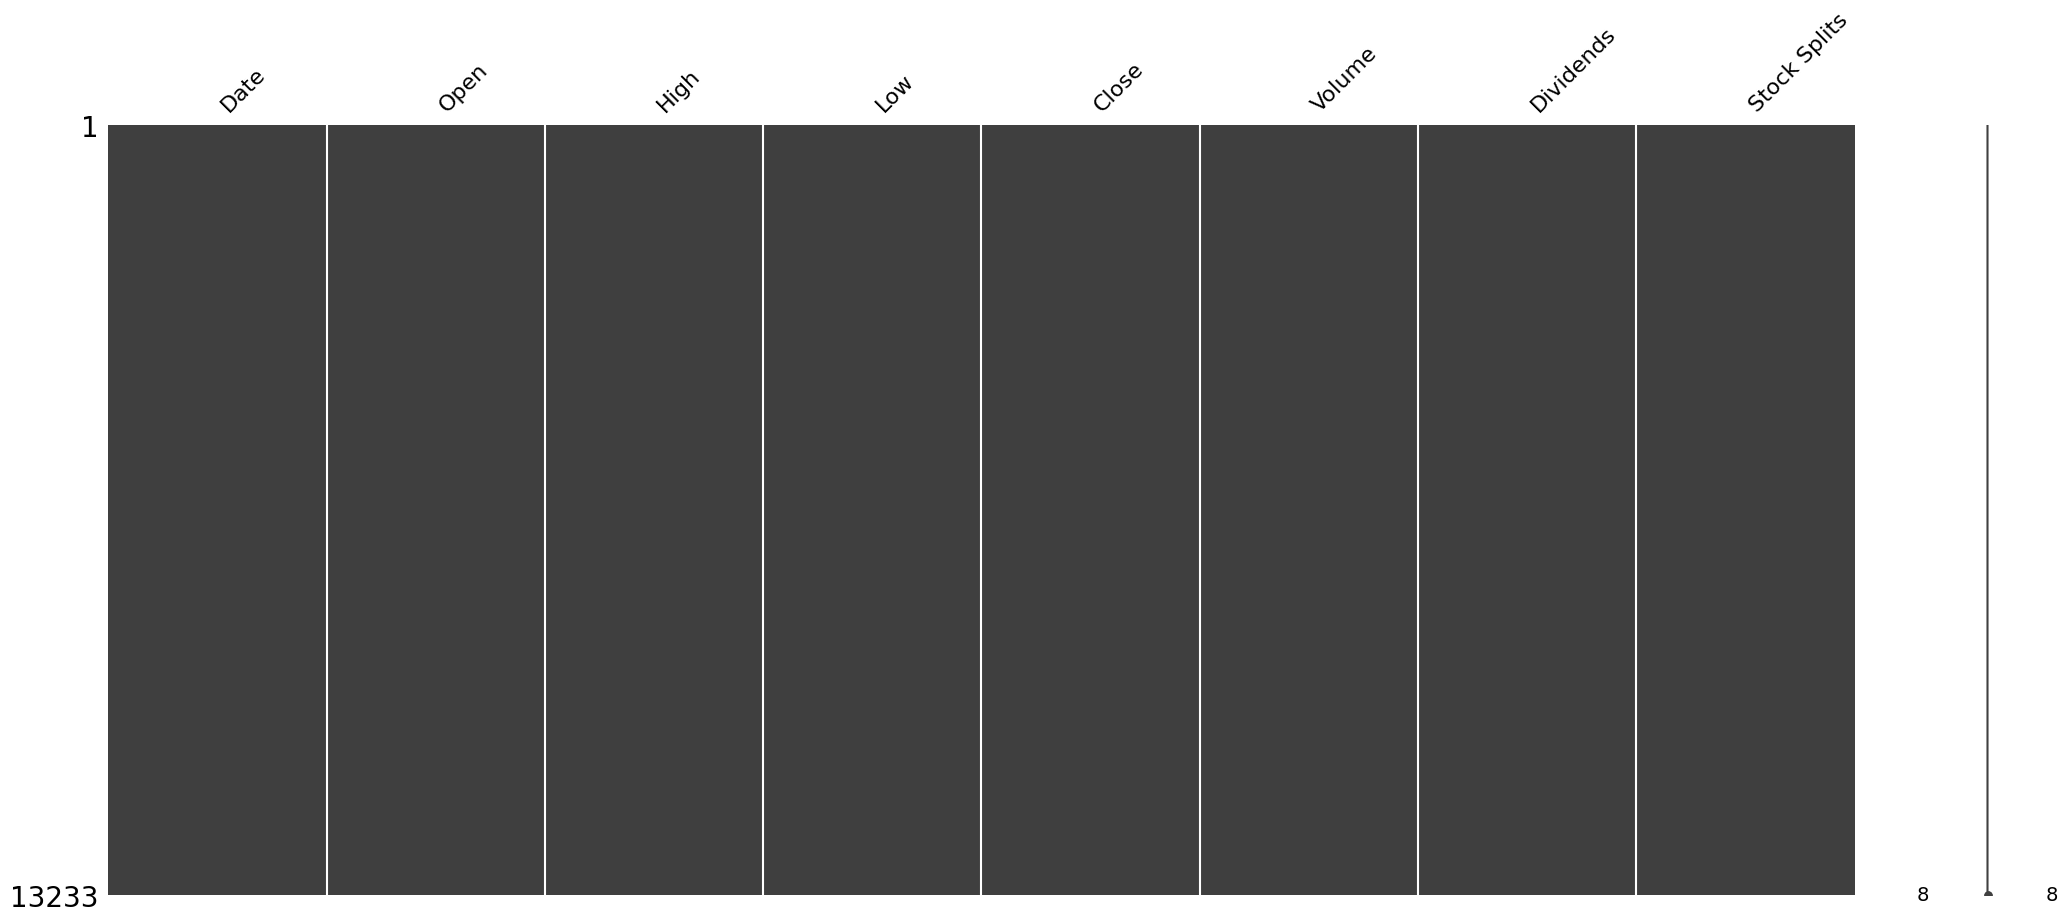

In [27]:
import pandas as pd 
import numpy as np 
import missingno as msno

df = pd.read_csv('C:\\Users\\User\\OneDrive\\Escritorio\\Proyecto Walmart\\walmart_stock_prices.csv')

msno.matrix(df)

suma = df.isnull().sum()

suma

In [28]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1972-08-25 00:00:00-04:00,0.011463,0.011683,0.011463,0.011639,7526400,0.0,0.0
1,1972-08-28 00:00:00-04:00,0.011639,0.011727,0.011595,0.011595,2918400,0.0,0.0
2,1972-08-29 00:00:00-04:00,0.011551,0.011551,0.011463,0.011463,5836800,0.0,0.0
3,1972-08-30 00:00:00-04:00,0.011463,0.011463,0.011374,0.011463,1228800,0.0,0.0
4,1972-08-31 00:00:00-04:00,0.011374,0.011374,0.011286,0.011286,2611200,0.0,0.0
...,...,...,...,...,...,...,...,...
13228,2025-02-14 00:00:00-05:00,105.300003,105.300003,103.599998,104.040001,14109500,0.0,0.0
13229,2025-02-18 00:00:00-05:00,103.720001,103.989998,102.510002,103.779999,18247300,0.0,0.0
13230,2025-02-19 00:00:00-05:00,103.849998,104.199997,102.550003,104.000000,18508000,0.0,0.0
13231,2025-02-20 00:00:00-05:00,98.779999,100.120003,96.680000,97.209999,55450900,0.0,0.0


Se puede observar que mediante la librería "matrix" no hay datos nulos o vacios en las columnas. Esto quiere decir que todos los datos están completos perfectamente. También utilizamos isnull() para probar solamente. Lo único que hay que realizar es un cambio de datos cen la columna date ya que esta como si fuese de tipo object cuando debería ser de tipo date justamente.


In [29]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', utc=True)


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13233 entries, 0 to 13232
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          13233 non-null  datetime64[ns, UTC]
 1   Open          13233 non-null  float64            
 2   High          13233 non-null  float64            
 3   Low           13233 non-null  float64            
 4   Close         13233 non-null  float64            
 5   Volume        13233 non-null  int64              
 6   Dividends     13233 non-null  float64            
 7   Stock Splits  13233 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 827.2 KB


In [31]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour     
df['Minute'] = df['Date'].dt.minute


In [33]:
df = df.drop(columns='Minute')

Decidí borra la columna minute porque no aportaba nada en realidad. Ahora procedo a exportar este dataset para poder trabajar en el EDA perfectamente.

In [36]:
exportar = df.to_csv('dataset_limpio.csv',index=False)